<Figure size 800x550 with 0 Axes>

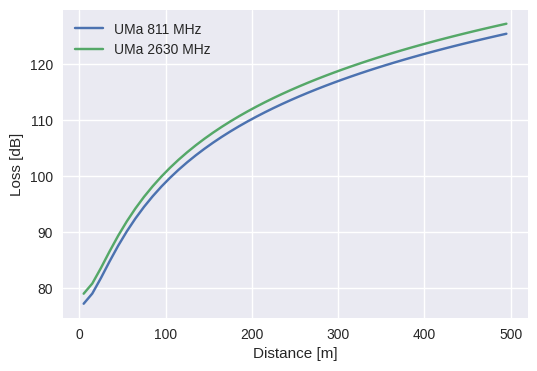

In [52]:
from scipy.constants import speed_of_light
import numpy as np
import matplotlib.pyplot as plt

def uma_los(d3d, d2d, dbp, fc, h_b, h_t):
    # 38.901 UMa LOS
    PL1 = 28+22*np.log10(d3d)+20*np.log10(fc)
    PL2 = 28+40*np.log10(d3d)+20*np.log10(fc) - 9*np.log10(dbp**2+(h_b - h_t)**2)
    PL = np.zeros((d3d.shape))
    PL = PL2 # Default pathloss
    PL[(np.greater_equal(d2d,10) & np.less_equal(d2d,dbp))] = PL1[(np.greater_equal(d2d,10) & np.less_equal(d2d,dbp))] # Overwrite if distance is greater than 10 meters or smaller than dbp
    return PL
    
def uma_nlos(d3d, d2d, dbp, fc, h_b, h_t):
    # 38901 UMa NLOS
    PL_nlos = 13.54+39.08*np.log10(d3d)+20*np.log10(fc)-0.6*(h_t-1.5)
    PL = np.zeros((d3d.shape))
    PL = np.maximum(uma_los(d3d, d2d, dbp, fc, h_b, h_t), PL_nlos)
    return PL

def pathloss_38901(distance, frequency, h_bs=30, h_ut=1.5):
    #print(distance)
    """
        Simple path loss model for computing RSRP based on distance.
        
        fc: frequency in GHz
        h_b: height of basestation
        h_t: height of UT
    """
    # Constants
    fc = frequency
    h_b =  h_bs # 30 meters
    h_t =  h_ut # 1.5

    # 2D distance 
    d2d = distance

    # 3D distance
    h_e = h_b - h_t # effective height
    d3d = np.sqrt(d2d**2+h_e**2)

    # Breakpoint distance
    dbp =  4*h_b*h_t*fc*10e8/speed_of_light

    loss = uma_nlos(d3d, d2d, dbp, fc, h_b, h_t)
    return loss


def plot_pathloss(load_data=False):
    distance = np.arange(5, 500,10)
    P_2630 = pathloss_38901(distance, 2.63)
    P_811 = pathloss_38901(distance, 2.14)

    with plt.style.context('seaborn'):
        fig = plt.figure(figsize=(6,4))
        plt.plot(distance, P_811, label='UMa 811 MHz')
        plt.plot(distance, P_2630, label='UMa 2630 MHz')
        plt.xlabel('Distance [m]')
        plt.ylabel('Loss [dB]')
        plt.legend()
        plt.savefig("plots/pathloss_38901.eps")
        plt.show()
        plt.tight_layout()


if __name__ == '__main__':
    plot_pathloss()

(100, 100)


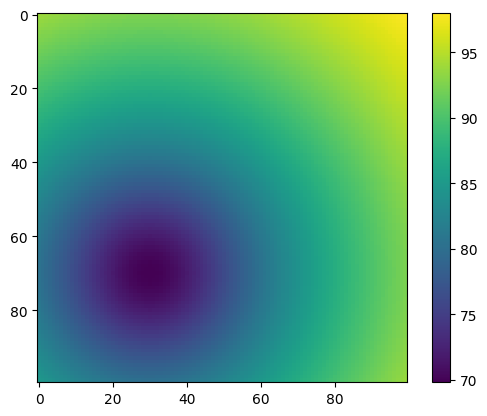

In [61]:
import math
distance = np.arange(5, 500,10)
P_2140 = pathloss_38901(distance, 2.14)

path_loss_heat_map = np.zeros((100, 100))
print(path_loss_heat_map.shape)
for row in range(path_loss_heat_map.shape[0]):
    for col in range(path_loss_heat_map.shape[1]):
        
        
        y = row
        x = col
        
        y += 50
        y = y * -1
        x += 50
        
        # Compute the distance between pixel and tx
        
        dist = math.sqrt((70 - row)**2 + (30 - col)**2)
        
        #print("passloss",pathloss_38901(np.array([dist]), 2.14))
        
        path_loss_heat_map[row][col] = pathloss_38901(np.array([dist]), 2.14, h_bs=21, h_ut=2)[0]
        
        #print(f'({row},{col})')
    
        #print(dist * 10)
        #print()
plt.imshow(path_loss_heat_map)
plt.colorbar()
plt.show()